# Model Project - P vs. Q in environmental policy making

In [1]:
#Preload packages
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sympy as sm
sm.init_printing(use_unicode=True)

from bokeh.layouts import row, widgetbox, column
from bokeh.models import CustomJS, Slider, Range1d
from bokeh.plotting import Figure, output_file, show, ColumnDataSource


# P vs. Q without uncertainty

## Model setup

Consider the optimal provision of an environmental good (Example used in Weitzman (1974) is "clean air", i.e. opposite of pollution) in a standard setting, where the marginal benefit of the good is decreasing in quantity and marginal cost of the good is increasing in quantity, i.e. the model can be expressed as:

* $B(q)$ is societies benefit in producing commodity $q$.
* $B'(q)<0$ is societies marginal benefit in producing commodity $q$.
* $C(q)$ is societies cost in producing commodity $q$.
* $B'(q)>0$ is societies marginal cost in producing commodity $q$.

The planner's problem is then to maximize:
$$ \max_q B(q)-C(q) $$
Which yields the solution
$$ B'(q^*)=C'(q^*)=p^* $$
Where $p^*$ is the optimal price for the environmental good.

Consider a functional form with no uncertainty:
* $B'(q) = a-b \cdot q $
* $C'(q) = c+d \cdot q $

## Graphical analysis

If we specify model parameters, we can solve the model graphically

In [2]:
#_par means parameter. We specify model parameters.
a_par = 30
b_par = 0.5
c_par = 5
d_par = 2

#Define functions.
def B_derivative(q):
    return (a_par - b_par * q)

def C_derivative(q):
    return (c_par + d_par * q)

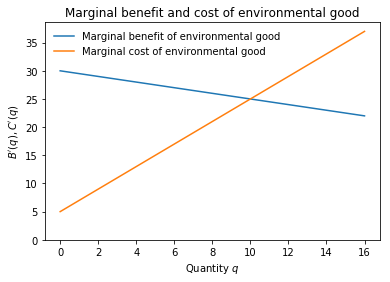

In [3]:
#Plot the specified functions given parameters
q = np.linspace(0, 16, 1000)
plt.plot(q, B_derivative(q), label = "Marginal benefit of environmental good")
plt.plot(q, C_derivative(q), label = "Marginal cost of environmental good")
plt.title("Marginal benefit and cost of environmental good")
plt.legend(frameon = False)
plt.xlabel("Quantity $q$")
plt.ylabel("$B'(q),C'(q)$")
plt.ylim(0)

## Analytical analysis
We can solve it analytically also using sympy

In [4]:
#Specify sympy symbols
a = sm.symbols('a')
b = sm.symbols('b')
c = sm.symbols('c')
d = sm.symbols('d')
q = sm.symbols('q')
p = sm.symbols('p')

#First we set marginal cost and benefit equal
equilibrium = sm.Eq(a-b*q,c+d*q)
equilibrium

In [5]:
#Solve for q
opt_q = sm.solve(equilibrium,q)
opt_q

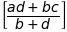

In [6]:
#Solve for P
MC = sm.Eq(c+d*q,p)
MC_subs = MC.subs(q,opt_q[0])
opt_p = sm.solve(MC_subs,p)
opt_p

## Numerical analysis

We can also solve the model numerically by solving a system of two equations with two unkowns:

In [7]:
MC_num = sm.Eq(a_par - b_par * q,p)
MB_num = sm.Eq(c_par + d_par * q,p)

sol_dict = sm.solve((MC_num,MB_num), (q, p))
print(f'p = {float(sol_dict[p])}')
print(f'q = {float(sol_dict[q])}')

p = 25.0
q = 10.0


## Welfare under policies
Aggregate welfare can be defined as:

$$ W = \int_0^{q^{pc}} (a-b\cdot q) - (c+ d \cdot q )dq$$

Where $q^{pc}$ is the amount produced of the environmental good under policy choice, $pc$. Under allowances  (q-policy) we will denote $q^{pc}=q^f$ for fixed and under pigouvian taxes (p-policy) we will denote this as $p^{pc}=q^t$ for taxes. The welfare difference between these two policy outcomes can be defined as:

$$\Delta W = W_{taxes} - W_{allowances}=  \int_0^{q^t} (a-b\cdot q) - (c+ d \cdot q )dq - \int_0^{q^f} (a-b\cdot q) - (c+ d \cdot q )dq$$

Which means if $\Delta W > 0$ then pigouvian taxes are prefered to allowances, and vice-versa. If $\Delta W=0$ then the social planner is indifferent.

## Policy under no uncertainty

In the case of no uncertainty, then it's obvious, if we consider pigouvian taxes or allowances as policy instruments, that both can yield the same outcome if set at efficient levels. Policy under no uncertainty can also be viewed as the case of uncertainty, but policy is set *ex post* rather *ex ante*.

We know that the optimal outcome is
$$ B'(q^*)=C'(q^*)=p^* $$

The above solutions shows that the optimal solution under quantity regulation (allowances) is:

$q^*=\frac{a-c}{b+d}$

And optimal price under price regulation (pigouvian taxes) is:

$p^* = \frac{ad+bc}{b+d}$

and the resulting $q^t$ (i.e. amount produced under taxes) is:

In [8]:
#We substitue optimal q in marginal cost function and derive amount produced under taxes
MC_sub = MC.subs(p,opt_p[0])

q_undertaxes = sm.solve(MC_sub,q)
q_undertaxes

which coincides with $q^*=q^f$ because of no uncertainty in the model.

Welfare under taxes is then:

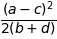

In [9]:
#We integrate from 0 to amount produced under taxes
welfare_taxes = sm.integrate((a-b*q)-(c+d*q), (q, 0, q_undertaxes))
sm.simplify(welfare_taxes)

Welfare under allowances is then:

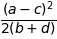

In [10]:
#We integrate from 0 to amount produced under allowances
welfare_allowances = sm.integrate((a-b*q)-(c+d*q), (q, 0, opt_q))
sm.simplify(welfare_allowances)

$\Delta W = W_{taxes} - W_{allowances}$ is then:

In [11]:
#Find welfare difference
sm.simplify(welfare_taxes - welfare_allowances)

Which means they yield the same end outcome, since quantities can be perfectly controlled under taxes aswell as allowances.

Numerically we can also see this:

In [12]:
#First we integrate over allowances
welfare_allowances_numerically = sm.integrate((a_par-b_par*q)-(c_par+d_par*q), (q, 0, sol_dict[q]))

#Define a function to see what is produced under taxes (MC function, but isolate for q as function of p)
def q_under_taxes_num(p):
    return ((p-c_par)/d_par)

q_tax = q_under_taxes_num(sol_dict[p])
q_tax

welfare_taxes_numerically = sm.integrate((a_par-b_par*q)-(c_par+d_par*q), (q, 0, q_tax))

print(f'Welfare under allowances={welfare_allowances_numerically:.2f}')
print(f'Welfare under taxes     ={welfare_taxes_numerically:.2f}')

Welfare under allowances=125.00
Welfare under taxes     =125.00


# P vs. Q with uncorrelated uncertainty

Consider the same setup above, but consider the wrinkle to the problem presented in Weitzman(1974), where we're unsure about the benefits and production costs of providing the environmental good *ex ante*:

The planner's problem is then to maximize:
$$ \max_q E[B(q,\eta)]-E[C(q,\theta)] $$
Which yields the first-order-condition:
$$ E[B'(q,\eta)]=E[C'(q,\theta)] $$
Where $p^*$ is the optimal price for the environmental good.

Consider a functional form with uncorrelated uncertainty:
* $B'(q,\eta) = a-b \cdot q + \eta $
* $C'(q,\theta) = c+d \cdot q + \theta $

Where we also assume:

* $E[\eta]=E[\theta]=0$,
* $E[\eta \theta]=0$,
* $E[\eta^2]=\sigma_\eta^2$ and
* $E[\theta^2]=\sigma_\theta^2$.

## Analytical analysis

In [13]:
#Define new sympy symbols
eta = sm.symbols('eta')
theta = sm.symbols('theta')
qt = sm.symbols('q^t')

#First we set marginal cost and benefit equal under the assumption we know the shock (ex post):
equilibrium_post = sm.Eq(a-b*q+eta,c+d*q+theta)
equilibrium_post

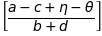

In [14]:
#Solve for optimal q (ex post)
q_post = sm.solve(equilibrium_post,q)
q_post

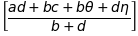

In [15]:
#Solve for optimal p (ex post)
MC = sm.Eq(c+d*q+theta,p)
MC_subs = MC.subs(q,q_post[0])
p_post = sm.solve(MC_subs,p)
p_post

In [16]:
#Ex ante we don't know the shocks, so we setup equilibrium equation ex ante.
equilibrium_pre = sm.Eq(a-b*q,c+d*q)
equilibrium_pre

In [17]:
#Solve for q (ex ante), as in model without uncertainty.  
#I.e. the optimal amount produced under uncertainty ex ante
q_opt_pre = sm.solve(equilibrium_pre,q)
q_opt_pre

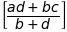

In [18]:
#Solve for p (ex ante)
MC = sm.Eq(c+d*q,p)
MC_subs = MC.subs(q,q_opt_pre[0])
p_pre = sm.solve(MC_subs,p)
p_pre

Firms will produce up until the point where $p=C'(q,\theta)$ since they choose their production after they observe the shock, i.e:

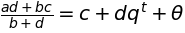

In [19]:
prod_problem = sm.Eq(p,c+d*qt+theta)
prod_prob_sub = prod_problem.subs(p,p_pre[0])
prod_prob_sub

Left hand side is the tax set beforehand. Right hand is the marginal cost of producing the environmental good. 

Which yields the optimal quantity under taxes *ex ante* to be:

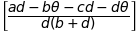

In [20]:
opt_pre_q_taxes = sm.solve(prod_prob_sub,qt)
opt_pre_q_taxes

We note that this is different from our *ex ante* solution for optimal $q$ under allowances:

$$ q^f = \frac{a-c}{b+d}$$ 

and optimal *ex post* solution:

$$ q^{post} = \frac{a-c+\eta-\theta}{b+d}$$

## Welfare under policies
The welfare difference between these two policy outcomes can be defined as under uncorrelated uncertainty:

$$\Delta W = W_{taxes} - W_{allowances}=  \int_0^{q^t} (a-b\cdot q+\eta) - (c+ d \cdot q + \theta)dq - \int_0^{q^f} (a-b\cdot q + \eta) - (c+ d \cdot q + \theta )dq$$

## Policy choice under uncorrelated uncertainty

Policy choice under uncorrelated uncertainty is harder to analyze, since taxes and allowances are set *ex ante* when shocks aren't know, hence the variance of the shocks are important when finding optimal policy.


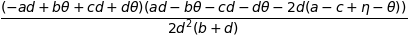

In [21]:
welfare_taxes = sm.integrate((a-b*q+eta)-(c+d*q+theta), (q, 0, opt_pre_q_taxes))
sm.simplify(welfare_taxes)

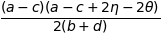

In [22]:
welfare_allowances = sm.integrate((a-b*q+eta)-(c+d*q+theta), (q, 0, opt_q))
sm.simplify(welfare_allowances)

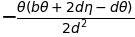

In [23]:
sm.simplify(welfare_taxes - welfare_allowances)

Expected difference is then (simplify a bit by hand, since sympy doesn't do this automatically):
$$ E[\Delta W] = E\left[-\frac{\theta(b \theta+2 d \eta-d \theta)}{2 d^{2}} \right] = E\left[-\frac{b \theta^2 + 2 d \eta \theta - d \theta^2}{2d^2} \right]= E\left[ \frac{\theta^2}{2d} - - \frac{2d\eta \theta}{2d^2}- \frac{b \theta^2}{2d^2} \right] = \frac{\sigma_\theta^2}{2d}-\frac{\sigma_\theta^2 b}{2d^2}$$

## Interactive figure, where model parameters can be set

Given the model above with uncorrelated uncertainty, we can present the following interactive figure, where model parameters can be set. The x-axis is $\sigma^2_\theta$ and y-axis is $E[\Delta W]$

In [24]:
output_file("callback.html")

x = np.linspace(0,10,500)
y = ((x*x)/(2*3))-((x*x*2)/(2*3*3))
s1=1
s2=1

source = ColumnDataSource(data=dict(x=x,y=y))

plot = Figure(plot_width=600, plot_height=500, title="Interactive graph for depicted expected wellfare differences between policies")
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)
plot.xaxis.axis_label = "𝜎_𝜃^2"
plot.xaxis.axis_label_text_font_style = "italic"

plot.yaxis.axis_label = "Expeted welfare from taxes - Expected welfare from allowances"
plot.yaxis.axis_label_text_font_style = "italic"

plot.y_range = Range1d(-15, 15)

#Making callback function using JavaScript to update function values given parameters (b,d)
callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var b = slider1.value;
    var d = slider2.value;
    x = data['x'];
    for (var i = 0; i < x.length; i++) {
        data.y[i] = ((x[i]*data.x[i])/(2*d))-((data.x[i]*data.x[i]*b)/(2*d*d));
    }
    source.change.emit();
""")

b = Slider(start=0, end=10, value=2, step=0.1,
                    title="Slider for parameter b (B''(q))", callback=callback)
callback.args["slider1"] = b

d = Slider(start=0, end=10, value=1, step=0.1,
                    title="Slider for parameter d (C''(q))", callback=callback)
callback.args["slider2"] = d

layout = column(plot, 
                widgetbox(b, d)
               )

show(layout)

As can be seen in the interactive figure, if b>>d then allowances is prefered and if d>>b then taxes are prefered in order to optimize expected welfare.

# P vs. Q with correlated uncertainty
Given correlation between the shocks in marginal benefits and costs, the expression for $\Delta W$ does not change in comparison to the uncorrelated case, as only the expected value of $\Delta W$ differs, as $E\left[\sigma^2_{\theta \eta}\right]$ now no longer is 0. Expected difference is then:
$$ E[\Delta W] = E\left[-\frac{\theta(b \theta+2 d \eta-d \theta)}{2 d^{2}}\right] = E\left[-\frac{b \theta^2 + 2 d \eta \theta - d \theta^2}{2d^2} \right]= E\left[ \frac{\theta^2}{2d} - \frac{2d\eta \theta}{2d^2}- \frac{b \theta^2}{2d^2} \right] = \frac{\sigma_\theta^2}{2d}-\frac{\sigma_\theta^2 b}{2d^2}-\frac{\sigma^2_{\theta \eta}}{d} $$
This expression can be reformulated to:
$$E[\Delta W]=\frac{\sigma^2_\theta}{d}\left[\frac{1}{2} - \frac{b}{2d}-\frac{\rho_{\theta \eta} \sigma_\eta}{\sigma_\theta}\right] $$
Where $\rho_{\theta \eta}$ is the correlation coefficient between benefits and costs.

# Model simulation of correlated uncertainty model

In the section below we try to simulate the model by showing expected welfare losses from different policies given the shocks we specify in the first block.

In [25]:
# Pick eta and theta (shocks to benefit and cost). 
eta = 0.2
theta = 0.4

def B_derivative_shock(q):
    return (a_par - b_par * q + eta)

def C_derivative_shock(q):
    return (c_par + d_par * q + theta)

In [26]:
a = sm.symbols('a')
b = sm.symbols('b')
c = sm.symbols('c')
d = sm.symbols('d')
q = sm.symbols('q')
p = sm.symbols('p')

#First we set marginal cost and benefit equal
equilibrium = sm.Eq(a-b*q,c+d*q)
equilibrium

#Solve for q
opt_q = sm.solve(equilibrium,q)

#Solve for P
MC = sm.Eq(c+d*q,p)
MC_subs = MC.subs(q,opt_q[0])
opt_p = sm.solve(MC_subs,p)

MB_num = sm.Eq(a_par - b_par * q,p)
MC_num = sm.Eq(c_par + d_par * q,p)

#Solve intial equilibrium without shock
sol_dict = sm.solve((MC_num,MB_num), (q, p))
print(f'p before shock = {float(sol_dict[p])}')
print(f'q before shock = {float(sol_dict[q])}')

#Solve for new equilibrium with shocks.
MB_num_shock = sm.Eq(a_par - b_par * q + eta,p)
MC_num_shock = sm.Eq(c_par + d_par * q + theta,p)
sol_dict_shock = sm.solve((MC_num_shock,MB_num_shock), (q,p))
print(f'p after shock  = {float(sol_dict_shock[p])}')
print(f'q after shock  = {float(sol_dict_shock[q])}')

#Solve where C'(q) crosses the tax set at 25
MC_shock_cut = sm.Eq(c_par + d_par * q + theta,25)
shock_dict = sm.solve(MC_shock_cut, q)

temp_a1 = sol_dict[q]
temp_a2 = sol_dict[p]
temp_b1 = sol_dict_shock[q]
temp_b2 = sol_dict_shock[p]
temp_c1 = shock_dict[0]

p before shock = 25.0
q before shock = 10.0
p after shock  = 25.24
q after shock  = 9.92


Which can be illustrated in the graph below

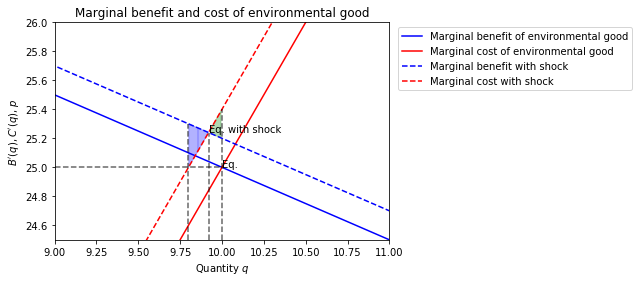

In [40]:
ymin = 24.5
ymax = 26
xmin = 9
xmax = 11

q = np.linspace(0, 16, 1000)
plt.plot(q, B_derivative(q), label = "Marginal benefit of environmental good", color='blue')
plt.plot(q, C_derivative(q), label = "Marginal cost of environmental good", color='red')
plt.plot(q, B_derivative_shock(q), label = "Marginal benefit with shock", color='blue', linestyle='--')
plt.plot(q, C_derivative_shock(q), label = "Marginal cost with shock", color='red', linestyle='--')
plt.title("Marginal benefit and cost of environmental good")
plt.legend(frameon = False)
plt.xlabel("Quantity $q$")
plt.ylabel("$B'(q), C'(q)$, $p$")
plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

plt.axvline(x=temp_a1, ymax=max( (C_derivative_shock(temp_a1)-ymin)/(ymax-ymin) , (B_derivative_shock(temp_a1)-ymin)/(ymax-ymin) , (temp_a2-ymin)/(ymax-ymin)), alpha=0.6, color='black', linestyle='--', label='Q')
plt.axvline(x=temp_c1, ymax=max( (C_derivative_shock(temp_c1)-ymin)/(ymax-ymin) , (B_derivative_shock(temp_c1)-ymin)/(ymax-ymin) ), alpha=0.6, color='black', linestyle='--', label='Q')
plt.axvline(x=temp_b1, ymax=(temp_b2-ymin)/(ymax-ymin), alpha=0.6, color='black', linestyle='--', label='Q')

plt.axhline(y=temp_a2, xmax=max( (temp_a1-xmin)/(xmax-xmin) , (temp_c1-xmin)/(xmax-xmin) ), alpha=0.6, color='black', linestyle='--', label='Q')

plt.text(x=temp_a1, y=temp_a2, s='Eq.', alpha=1, color='black')
plt.text(x=temp_b1, y=temp_b2, s='Eq. with shock', alpha=1, color='black')

if (float(eta)<0 and float(theta)<0) :
    plt.fill_between(q, B_derivative_shock(q), C_derivative_shock(q), where = (q>temp_b1) & (q<temp_c1), alpha = 0.3, color='blue', hatch = '|')
    plt.fill_between(q, B_derivative_shock(q), C_derivative_shock(q), where = (q>temp_a1) & (q<temp_b1), alpha = 0.3, color='green', hatch = '|')

elif (float(eta)>0 and float(theta)>0) :
    plt.fill_between(q, B_derivative_shock(q), C_derivative_shock(q), where = (q>temp_c1) & (q<temp_b1), alpha = 0.3, color='blue', hatch = '|')
    plt.fill_between(q, B_derivative_shock(q), C_derivative_shock(q), where = (q<temp_a1) & (q>temp_b1), alpha = 0.3, color='green', hatch = '|')

elif (float(eta)<0 and float(theta)>0) :
    plt.fill_between(q, B_derivative_shock(q), C_derivative_shock(q), where = (q>temp_b1) & (q<temp_c1), alpha = 0.3, color='blue', hatch = '|')
    plt.fill_between(q, B_derivative_shock(q), C_derivative_shock(q), where = (q>temp_b1) & (q<temp_a1), alpha = 0.3, color='green', hatch = '|')

elif (float(eta)>0 and float(theta)<0) :
    plt.fill_between(q, B_derivative_shock(q), C_derivative_shock(q), where = (q<temp_b1) & (q>temp_c1), alpha = 0.3, color='blue', hatch = '|')
    plt.fill_between(q, B_derivative_shock(q), C_derivative_shock(q), where = (q<temp_b1) & (q>temp_a1), alpha = 0.3, color='green', hatch = '|')


Given $\eta=0.2$ and $\theta=0.4$ we see that the welfare loss that comes from taxes (blue triangle) is larger than the deadweight loss from allowances (green triangle), since $B''(q)=b$ (0.5) << $C''(q)=d$ (2), as we saw in ther interactive figure above.

# TODO in exam week:

Monte Carlo simulation table/histograms for different parametrizations of $b,d,\sigma_\eta^2,\sigma_\theta^2,\sigma_{\eta,\theta}^2$
to estimate expected welfare given different policies.

Using the code below to draw from a multivariate normal distribution and allow varying degrees of correlation between shocks

In [ ]:
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]  # diagonal covariance
eta, theta = np.random.multivariate_normal(mean, cov, 1).T